In [21]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math
from mpl_toolkits import mplot3d
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter

In [22]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [23]:
def HI(EJ,teta,val_phi,phiext):
    ans=-EJ*np.cos(teta)*np.cos(val_phi-(phiext/2)) #
    return ans

In [24]:
E_J=1.0
E_J_2=1.0/5.0
phi_ext=np.pi

theta=np.arange(-np.pi/2,3*np.pi/2,np.pi/10)
print(theta)
print(len(theta))
phi=np.arange(-4*np.pi,4*np.pi,np.pi/4)
print(phi)
print(len(phi))

THETA,PHI=np.meshgrid(theta,phi)
POTENTIAL=HI(E_J,THETA,PHI,phi_ext)

[-1.57079633 -1.25663706 -0.9424778  -0.62831853 -0.31415927  0.
  0.31415927  0.62831853  0.9424778   1.25663706  1.57079633  1.88495559
  2.19911486  2.51327412  2.82743339  3.14159265  3.45575192  3.76991118
  4.08407045  4.39822972]
20
[-1.25663706e+01 -1.17809725e+01 -1.09955743e+01 -1.02101761e+01
 -9.42477796e+00 -8.63937980e+00 -7.85398163e+00 -7.06858347e+00
 -6.28318531e+00 -5.49778714e+00 -4.71238898e+00 -3.92699082e+00
 -3.14159265e+00 -2.35619449e+00 -1.57079633e+00 -7.85398163e-01
  1.42108547e-14  7.85398163e-01  1.57079633e+00  2.35619449e+00
  3.14159265e+00  3.92699082e+00  4.71238898e+00  5.49778714e+00
  6.28318531e+00  7.06858347e+00  7.85398163e+00  8.63937980e+00
  9.42477796e+00  1.02101761e+01  1.09955743e+01  1.17809725e+01]
32


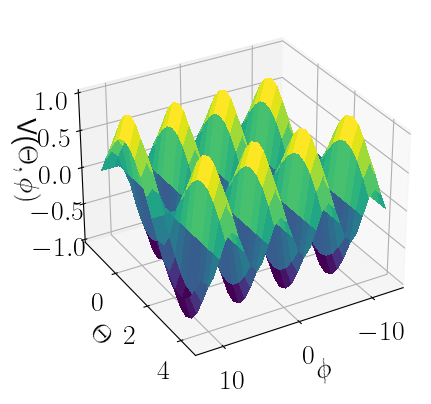

In [25]:
figPOT = plt.figure()
axPOT = plt.axes(projection='3d')
axPOT.plot_surface(PHI,THETA,POTENTIAL, cmap="viridis", linewidth=0, antialiased=False, alpha=1)#changing x and y 
axPOT.set_xlabel('$\phi$')
axPOT.set_ylabel('$\Theta$')
axPOT.set_zlabel('V($\Theta,\phi)$')
# rotation
axPOT.view_init(30, 60)
#plt.savefig('3D_POTENTIAL.pdf',dpi=600)
plt.show()

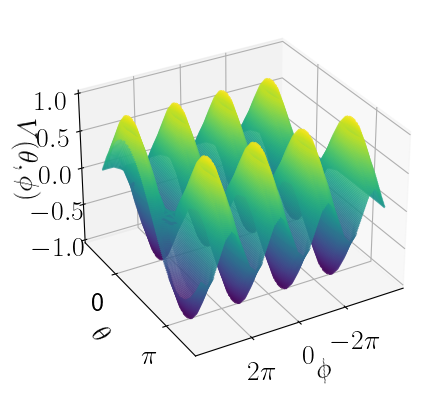

In [26]:
fig3 = plt.figure()
ax3 = plt.axes(projection='3d')
ax3.contour3D(PHI, THETA,POTENTIAL, 100, cmap='viridis',alpha=0.8)
ax3.set_xlabel('$\phi$')
ax3.set_ylabel(r'$\theta$')
ax3.set_zlabel(r'$V (\theta,\phi)$')
ax3.set_xticks([-2*np.pi,0,2*np.pi],['$-2\pi$','$0$','$2\pi$'])
ax3.set_yticks([0,np.pi],['0','$\pi$'])
ax3.view_init(30, 60)
#plt.savefig('3Dplot3.pdf',dpi=600)
plt.show()

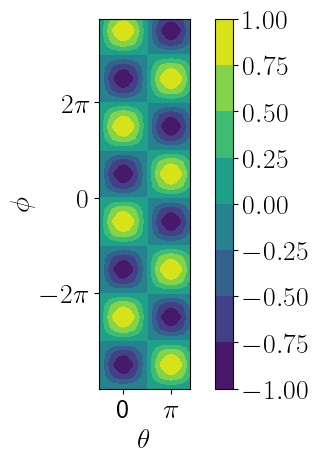

In [27]:
figPOT2=plt.figure()
plt.contourf(THETA,PHI, POTENTIAL, cmap="viridis")
plt.axis('image')
plt.ylabel("$\phi$")
plt.xlabel(r"$\theta$")
plt.yticks([-2*np.pi,0,2*np.pi],['$-2\pi$','$0$','$2\pi$'])
plt.xticks([0,np.pi],['0','$\pi$'])
plt.colorbar()
#plt.savefig('COLORMAP_POTENTIAL_3.pdf')
plt.show()

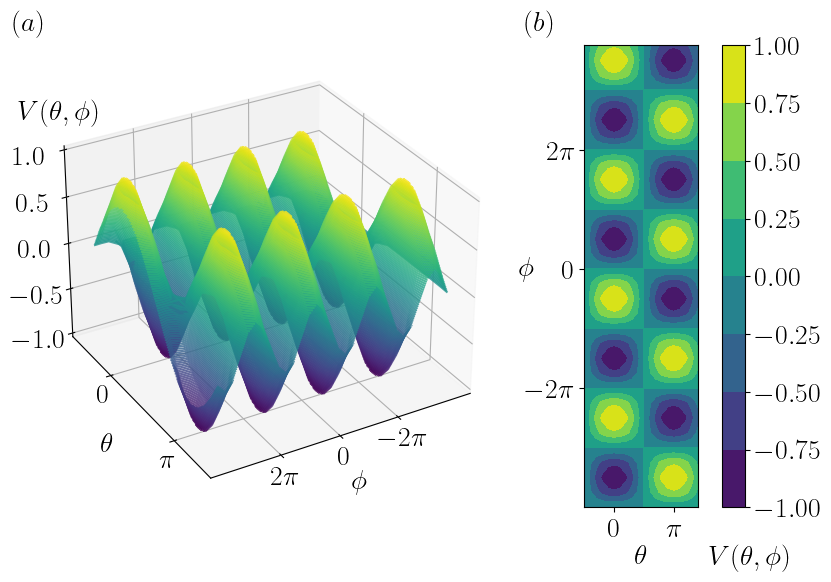

In [31]:
# Create the figure and subplots
fig = plt.figure(figsize=(10, 6))

# Plot 1: 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
#surf1 = ax1.plot_surface(PHI,THETA,POTENTIAL, cmap="viridis", linewidth=0, antialiased=False)#, alpha=0.5
surf1 =ax1.contour3D(PHI, THETA,POTENTIAL, 100, cmap='viridis',alpha=0.8)
#ax1.set_xlabel('$\phi$',fontdict={'fontsize':20,'color':'k'},labelpad=5.0)
#ax1.set_ylabel(r'$\theta$',fontdict={'fontsize':20,'color':'k'},labelpad=8.0)
#ax1.set_zlabel(r'$V (\theta,\phi)$',fontdict={'fontsize':20,'color':'k'},labelpad=20.0)
ax1.set_xticks([-2*np.pi,0,2*np.pi],['$-2\pi$','$0$','$2\pi$'])
ax1.set_yticks([0,np.pi],['$0$','$\pi$'])
ax1.tick_params(axis='x', pad=-3.0)
ax1.tick_params(axis='y', pad=-3.0)
ax1.tick_params(axis='z', pad=7.0)
ax1.text(6*np.pi,-np.pi/2,1.52,r'$V (\theta,\phi)$', fontsize=20)
ax1.text(6.5*np.pi,1.8*np.pi/2,-1.0,r'$\theta$', fontsize=20)
ax1.text(1.5,1.9*np.pi,-1.3,r'$\phi$', fontsize=20)
ax1.text(6*np.pi,-np.pi/2,2.4,r'$(a)$', fontsize=20)
ax1.view_init(30, 60)

# Plot 2: First contour plot
ax2 = fig.add_subplot(122)
contour1 = ax2.contourf(THETA,PHI, POTENTIAL, cmap="viridis")
plt.axis('image')
#ax2.set_ylabel("$\phi$",fontdict={'fontsize':20,'color':'k'})
ax2.set_xlabel(r"$\theta$",fontdict={'fontsize':20,'color':'k'})
ax2.xaxis.set_label_coords(0.5, -0.08)
ax2.yaxis.set_label_coords(-0.4, 0.51)
ax2.set_yticks([-2*np.pi,0,2*np.pi],['$-2\pi$','$0$','$2\pi$'])
ax2.set_xticks([0,np.pi],['$0$','$\pi$'])
ax2.text(-5,-0.4,r'$\phi$', fontsize=20)
ax2.text(5,-4.97*np.pi,r'$V (\theta,\phi)$', fontsize=20)
ax2.text(-1.5*np.pi,4*np.pi,r'$(b)$', fontsize=20)
colorbar1 = plt.colorbar(contour1, ax=ax2)
#colorbar1.set_label(r'$V (\theta,\phi)$',fontdict={'fontsize':20,'color':'k'},labelpad=10.0)

# Adjust the spacing between subplots
fig.subplots_adjust(wspace=-0.4)

# Show the figure
#plt.savefig('POTENTIALDEF_PRUEBA.png',dpi=300,bbox_inches='tight')
plt.show()

In [29]:
PHI.shape

(32, 20)

In [30]:
THETA.shape

(32, 20)